In [1]:
import  scipy.stats                     as  stats
import  statsmodels.stats.proportion    as  SMP 
import  numpy                           as  np
import  pandas                          as  pd
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.display import Image
import statistics 

In [2]:
hr=pd.read_table("HR.txt")

C:\Users\Megha Singhal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [3]:
hr.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Ind1,Yes,41,1,1102,1,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,Ind2,No,49,2,279,2,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,Ind3,Yes,37,1,1373,2,2,2,6,1,...,2,80,0,7,3,3,0,0,0,0
3,Ind4,No,33,2,1392,2,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,Ind5,No,27,1,591,2,2,1,2,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.shape

(1470, 35)

In [5]:
hr.columns

Index(['Individual ', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr.Gender.value_counts()

1    882
2    588
Name: Gender, dtype: int64

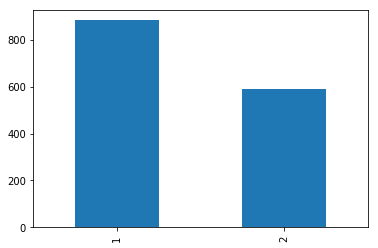

In [7]:
hr.Gender.value_counts().plot(kind="bar")

In [8]:
hr.groupby(by=["MonthlyIncome","Gender"])

In [9]:
AG=hr.groupby("Gender")


In [10]:
AG1=AG.get_group(1)
AG2=AG.get_group(2)

In [11]:
AG1.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,Ind2,No,49,2,279,2,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,Ind3,Yes,37,1,1373,2,2,2,6,1,...,2,80,0,7,3,3,0,0,0,0
4,Ind5,No,27,1,591,2,2,1,2,1,...,4,80,1,6,3,3,2,2,2,2
5,Ind6,No,32,2,1005,2,2,2,1,1,...,3,80,0,8,2,2,7,7,3,6
7,Ind8,No,30,1,1358,2,24,1,1,1,...,2,80,1,1,2,3,1,0,0,0


In [12]:
AG1.shape

(882, 35)

In [13]:
AG2.shape

(588, 35)

In [14]:
#unpaired t-test

g1=AG1["MonthlyIncome"]
g2=AG2["MonthlyIncome"]

(array([232., 207., 171.,  65.,  67.,  35.,  22.,   9.,  29.,  45.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

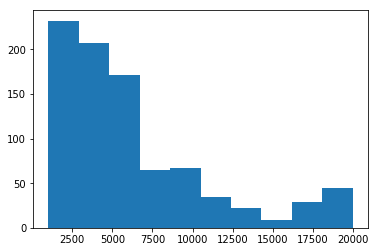

In [15]:
#Male income
plt.hist(g1)

(array([146., 136., 114.,  44.,  42.,  20.,  30.,   9.,  25.,  22.]),
 array([ 1129. ,  3013.4,  4897.8,  6782.2,  8666.6, 10551. , 12435.4,
        14319.8, 16204.2, 18088.6, 19973. ]),
 <a list of 10 Patch objects>)

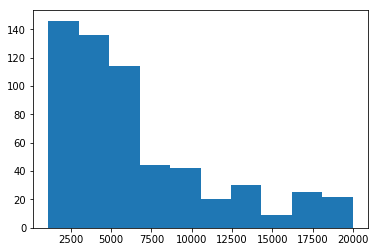

In [16]:
#Female income
plt.hist(g2)

In [17]:
g1.describe()

count      882.000000
mean      6380.507937
std       4714.856577
min       1009.000000
25%       2819.500000
50%       4837.500000
75%       8113.750000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [18]:
g2.describe()

count      588.000000
mean      6686.566327
std       4695.608507
min       1129.000000
25%       3037.000000
50%       5081.500000
75%       8711.750000
max      19973.000000
Name: MonthlyIncome, dtype: float64

In [19]:
#Check for normality
import numpy       as np
import pandas      as pd
import scipy.stats as stats
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon,mannwhitneyu,levene,shapiro,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
print(shapiro(g1))
print(shapiro(g2))
#Here data is not normal so we check for non paraetric

(0.8169718384742737, 1.709933327621381e-30)
(0.8416616916656494, 9.378564564919968e-24)


In [20]:
#Both groups are not normal
#Both group variance is same
bartlett(g1,g2)

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [21]:
#High p value fails to reject the null hypothesis

In [22]:
u_stat,p_val=mannwhitneyu(g1,g2)
print(p_val)

0.044208341633010594


In [23]:
# Its less then 0.05 so we reject the null hypothesis

In [24]:
# Yes their is significant difference salary of male and female
# Average salary of female is greater then the average salary of males.

In [25]:
hr.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Ind1,Yes,41,1,1102,1,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,Ind2,No,49,2,279,2,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,Ind3,Yes,37,1,1373,2,2,2,6,1,...,2,80,0,7,3,3,0,0,0,0
3,Ind4,No,33,2,1392,2,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,Ind5,No,27,1,591,2,2,1,2,1,...,4,80,1,6,3,3,2,2,2,2


In [26]:
hr.columns


Index(['Individual ', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [27]:
AG=hr.groupby("Gender")


In [28]:
AG1=AG.get_group(1)
AG2=AG.get_group(2)

In [29]:
g1=AG1["Age"]
g2=AG2["Age"]

In [30]:
print(shapiro(g1))
print(shapiro(g2))

(0.9764998555183411, 1.0052821075579033e-10)
(0.9777933955192566, 8.791240446726079e-08)


In [31]:
#Shapiro failed data is not normal

In [32]:
#Test of Variance

In [33]:
bartlett(g1,g2)


BartlettResult(statistic=0.4220122362875722, pvalue=0.5159346814723328)

In [34]:
#p value is greater so it fails to accept the null hypothesis


In [35]:
u_stat,p_val=mannwhitneyu(g1,g2)
print(p_val)

0.08331979343883855


# z-test (Propotion data)

In [36]:
f=pd.crosstab(hr["Attrition"],hr["Gender"])

In [37]:
f

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [38]:
p1=150/882
p1

0.17006802721088435

In [39]:
p2=87/588
p2

0.14795918367346939

In [40]:
p_pooled=(150+87)/(882+588)
p_pooled

0.16122448979591836

In [41]:
z=(p1-p2)/np.sqrt(p_pooled*(1-p_pooled)*((1/882)+(1/588)))


In [42]:
z

1.1292547809155016

In [43]:
from scipy.stats  import norm
z=1-stats.norm.cdf(1.129)
z*2

0.2588978336775931

In [44]:
df=pd.read_csv("migrane.csv")

In [45]:
df.head()

,Unnamed: 0,id,time,dos,hatype,age,airq,medication,headache,Gender
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [46]:
a=pd.crosstab(df["headache"],df["Gender"])
a

Gender,female,male
headache,,
no,1266,220
yes,2279,387


In [47]:
# total male=607
# total female=3545


In [48]:
p1=387/607
p1

0.6375617792421746

In [49]:
p2=2279/3545
p2

p_pooled=(387+2279)/(607+3545)
p_pooled

0.6421001926782274

In [50]:
z=(p1-p2)/np.sqrt(p_pooled*(1-p_pooled)*((1/607)+(1/3545)))
z

-0.2524275906432048

In [51]:
abs(z)

0.2524275906432048

In [52]:
from scipy.stats  import norm
p=1-stats.norm.cdf(0.2524)
p*2

0.8007319001452069

In [53]:
95+85+70


250

In [54]:
95/250

0.38

In [55]:
85/250

0.34

In [56]:
70/250

0.28

In [57]:
0.34+0.28+0.38

1.0

In [58]:
410+340+250

1000

In [59]:
410/1000

0.41

In [60]:
340/1000

0.34

In [61]:
250/1000

0.25

In [62]:
0.41+0.34+0.25

1.0

In [63]:
# Chi-square

In [64]:
ob=np.array([410,340,250,95,85,70])
ex=np.array([404,340,256,101,85,64])

In [65]:
chi_val=(((ob-ex)**2/ex).sum())
chi_val

1.1486695544554455

In [66]:
# for three samples or more its chi_square test

In [67]:
import pandas as pd
CT=pd.DataFrame({
    "Healthy":[410,95],
    "Mild":[340,85],
    "Severe":[250,70]
},index=["Male","Female"])
CT

,Healthy,Mild,Severe
Male,410,340,250
Female,95,85,70


In [68]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(CT)

In [69]:
EC

array([[404., 340., 256.],
       [101.,  85.,  64.]])

In [70]:
print(EC)

[[404. 340. 256.]
 [101.  85.  64.]]


In [71]:
print(ch_val)


1.1486695544554455


In [72]:
print(p_val)

0.5630793174318253


In [73]:
#p val>0.05 we fail to reject null hypothesis :Propotion of three groups (healthy,mild,severe) is same

In [74]:
a=pd.crosstab(hr["Attrition"],hr["Gender"])
a

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [75]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [76]:
print(ch_val)


1.1169671241970978


In [77]:
chi2_contingency(a)

(1.1169671241970978, 0.29057244902890855, 1, array([[739.8, 493.2],
        [142.2,  94.8]]))

In [78]:
print(p_val)

0.29057244902890855


In [79]:
print(EC)

[[739.8 493.2]
 [142.2  94.8]]


In [80]:
a=pd.crosstab(hr["Attrition"],hr["Department"])
a

Department,1,2,3
Attrition,,,
No,354,828,51
Yes,92,133,12


In [81]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [82]:
print(ch_val)

10.79600732241067


In [83]:
print(p_val)

0.004525606574479633


In [84]:
print(EC)

[[374.09387755 806.06326531  52.84285714]
 [ 71.90612245 154.93673469  10.15714286]]


In [85]:
chi2_contingency(a)

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[374.09387755, 806.06326531,  52.84285714],
        [ 71.90612245, 154.93673469,  10.15714286]]))

In [86]:
df.head()

,Unnamed: 0,id,time,dos,hatype,age,airq,medication,headache,Gender
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [89]:
a=pd.crosstab(df["hatype"],df["Gender"])

Gender,female,male
hatype,,
Aura,1593,117
Mixed,291,166
No Aura,1661,324


In [91]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [92]:
p_val

0.004525606574479633

In [93]:
ch_val

10.79600732241067

In [95]:
#AURA MIGRAIN PERCENTAGE

In [96]:
1593+291+1661

3545

In [97]:
1593/3545

0.44936530324400564

In [98]:
291/3545

0.08208744710860366

In [100]:
1661/3545

0.4685472496473907

In [101]:
117+166+324


607

In [102]:
117/607

0.1927512355848435

In [103]:
166/607

0.27347611202635913

In [104]:
324/607

0.5337726523887973

In [105]:
EC

array([[374.09387755, 806.06326531,  52.84285714],
       [ 71.90612245, 154.93673469,  10.15714286]])

In [106]:
#feamle are highly affected by aura type

In [135]:
df1=pd.read_csv("heart (1).csv")

In [136]:
df1.head()

,age,gender,chest_pain,blood_pressure,cholestoral,blood_sugar,ecg,heart_rate,exercise,oldpeak,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [141]:
a=pd.crosstab(df1["gender"],df1["disease"])
a

disease,1,2
gender,,
0,67,20
1,83,100


In [143]:
#0 affected with heart disease

67/(67+83)

0.44666666666666666

In [144]:
#1 affected with heart disease
83/(67+83)

0.5533333333333333

In [146]:
20/87

0.22988505747126436

In [148]:
100/183

0.546448087431694

In [149]:
#label 1 with disease 1
83/(83+100)

0.453551912568306

In [138]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [139]:
ch_val


3.0739613982367193

In [120]:
hr.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Ind1,Yes,41,1,1102,1,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,Ind2,No,49,2,279,2,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,Ind3,Yes,37,1,1373,2,2,2,6,1,...,2,80,0,7,3,3,0,0,0,0
3,Ind4,No,33,2,1392,2,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,Ind5,No,27,1,591,2,2,1,2,1,...,4,80,1,6,3,3,2,2,2,2


In [121]:
hr.columns

Index(['Individual ', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [128]:
a=pd.crosstab(hr["Department"],hr["Attrition"])

In [129]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [130]:
print(EC)
print(ch_val)
print(p_val)
#reject the null hypothesis

[[374.09387755  71.90612245]
 [806.06326531 154.93673469]
 [ 52.84285714  10.15714286]]
10.79600732241067
0.004525606574479633


In [131]:
a=pd.crosstab(hr["Education"],hr["Attrition"])

In [132]:
from scipy.stats import chisquare,chi2_contingency
ch_val,p_val,nrow,EC=chi2_contingency(a)

In [134]:
print(EC)
print(ch_val)
print(p_val)
#Accept the null hypothesis

[[142.59183673  27.40816327]
 [236.53469388  45.46530612]
 [479.77959184  92.22040816]
 [333.83265306  64.16734694]
 [ 40.26122449   7.73877551]]
3.0739613982367193
0.5455253376565949


In [150]:
54/181 #excercise who do have low risk of heart attack

0.2983425414364641

In [151]:
66/89 #non excercise high risk of heart attack

0.7415730337078652

In [152]:
AG=hr.groupby("Gender")

In [156]:
AG1=AG.get_group(1)
AG2=AG.get_group(2)

In [158]:
g1=AG1["Department"]
g2=AG2["Department"]

In [159]:
print(shapiro(g1))
print(shapiro(g2))

(0.7012040019035339, 7.690146606011163e-37)
(0.6894677877426147, 1.8275328387629546e-31)


In [160]:
bartlett(g1,g2)

BartlettResult(statistic=0.15670882422753837, pvalue=0.6922048775629861)

In [161]:
u_stat,p_val=mannwhitneyu(g1,g2)
print(p_val)


0.06363461153232541


In [180]:
#Accepts null  hypothsesis 



In [163]:
hr.head()

,Individual,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Ind1,Yes,41,1,1102,1,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,Ind2,No,49,2,279,2,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,Ind3,Yes,37,1,1373,2,2,2,6,1,...,2,80,0,7,3,3,0,0,0,0
3,Ind4,No,33,2,1392,2,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,Ind5,No,27,1,591,2,2,1,2,1,...,4,80,1,6,3,3,2,2,2,2


In [164]:
AG=hr.groupby("Attrition")

In [166]:
hr.columns

Index(['Individual ', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [168]:
a=pd.crosstab(hr["Attrition"],hr["Education"])

In [169]:
a

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [170]:
31/170

0.18235294117647058

In [171]:
44/282

0.15602836879432624

In [172]:
31+44+99+58+5

237

In [173]:
a=pd.crosstab(hr["Department"],hr["Gender"])

In [174]:
a

Gender,1,2
Department,,
1,257,189
2,582,379
3,43,20


In [175]:
20/63

0.31746031746031744

In [178]:
189/(189+379+20)

0.32142857142857145

In [181]:
hr["Department"].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [184]:
chisquare(hr["Department"].value_counts())

Power_divergenceResult(statistic=828.7877551020408, pvalue=1.074052833315366e-180)

# one sample propotion test

In [186]:
from statsmodels.stats.proportion import proportions_ztest

In [187]:
proportions_ztest(200,500,0.25) #numerator denom percentage

(6.846531968814578, 7.566174380650747e-12)

In [188]:
200/500


0.4

In [189]:
#it rejects the null hypothesis


In [190]:
proportions_ztest(200,500,0.25) 

(6.846531968814578, 7.566174380650747e-12)

In [192]:
150/500


0.3

In [193]:
#reject the null hypothsis

In [194]:
120/500

0.24

In [195]:
#now it passed

In [196]:
proportions_ztest(125,500,0.25) 

(0.0, 1.0)

In [197]:
#100 percent 



In [198]:
import numpy as np
import pandas as pd


In [199]:
D=[43,45,45,47]
a=[30,40,50,60]
b=[25,30,50,55]
c=[25,30,40,45]

In [204]:
g1_df=pd.DataFrame()
df1=pd.DataFrame({"group":"a","age":[30,40,50,60]})
df2=pd.DataFrame({"group":"b","age":[25,30,50,55]})
df3=pd.DataFrame({"group":"c","age":[25,30,40,45]})

In [205]:
print(df1.mean())

age    45.0
dtype: float64


In [206]:
print(df2.mean())

age    40.0
dtype: float64


In [207]:
print(df3.mean())

age    35.0
dtype: float64


In [212]:
a=[30,40,50,60,25,30,50,55,25,30,40,45]
b=pd.DataFrame(a)
b.mean()

0    40.0
dtype: float64

In [218]:
s1=df1.var()**2

In [219]:
s2=df2.var()**2

In [220]:
s3=df3.var()**2

In [221]:
aa=3*(s1+s2+s3)
aa/(12-1)

age    22272.727273
dtype: float64

In [228]:
df1=pd.DataFrame({"group":"a","age":[30,40,50,60]})
df2=pd.DataFrame({"group":"b","age":[25,30,50,55]})
df3=pd.DataFrame({"group":"c","age":[25,30,40,45]})
df=pd.DataFrame()
df=df.append(df1)
df=df.append(df2)
df=df.append(df3)

In [230]:
df

,group,age
0,a,30
1,a,40
2,a,50
3,a,60
0,b,25
1,b,30
2,b,50
3,b,55
0,c,25
1,c,30


In [232]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df

,group,age
0,a,30
1,a,40
2,a,50
3,a,60
0,b,25
1,b,30
2,b,50
3,b,55
0,c,25
1,c,30


In [237]:
mod=ols('age~group',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,200.0,100.000000,0.642857,0.548323
Residual,9.0,1400.0,155.555556,NaN,NaN


In [239]:
from scipy.stats import f_oneway
a=[30,40,50,60]
b=[25,30,50,55]
c=[25,30,40,45]
f_oneway(a,b,c)

F_onewayResult(statistic=0.6428571428571429, pvalue=0.5483227164089495)

In [240]:

D=[43,45,45,47]
E=[37,40,40,43]
F=[34,35,35,36]
f_oneway(D,E,F)

F_onewayResult(statistic=32.14285714285714, pvalue=7.970844367886858e-05)

In [243]:
mod=ols('age~group',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,200.0,100.000000,0.642857,0.548323
Residual,9.0,1400.0,155.555556,NaN,NaN


In [246]:
g2_df=pd.DataFrame()
df1=pd.DataFrame({"group":"D","age":[43,45,45,47]})
df2=pd.DataFrame({"group":"E","age":[37,40,40,43]})
df3=pd.DataFrame({"group":"F","age":[34,35,35,36]})
g2_df=g2_df.append(df1)
g2_df=g2_df.append(df2)
g2_df=g2_df.append(df3)
mod=ols('age~group',data=g2_df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

           df  sum_sq     mean_sq          F   PR(>F)
group     2.0   200.0  100.000000  32.142857  0.00008
Residual  9.0    28.0    3.111111        NaN      NaN


In [245]:
# for a b and c all means are same they are (they are far apart)
#def are compact not far apart can overlap(Means are far apart)

C:\Users\Megha Singhal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Megha Singhal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Megha Singhal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
group,0.0,0.0,NaN,NaN,NaN
Residual,3.0,500.0,166.666667,NaN,NaN


In [247]:
#mstr large seperability far apart points

In [248]:
df=pd.read_csv("fair_pay.csv")

In [249]:
df.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


# ONE WAY ANOVA

In [250]:
mod=ols('salary~department',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

                df        sum_sq       mean_sq         F    PR(>F)
department     2.0  1.081095e+09  5.405473e+08  1.509535  0.221356
Residual    1467.0  5.253160e+11  3.580886e+08       NaN       NaN


In [251]:
#High p value fails to reject

In [253]:
AG=df.groupby("salary")

In [256]:
AG1=AG.get_group("No")
AG2=AG.get_group("Yes")

In [258]:

g1=AG1["Department"]
g2=AG2["Department"]

In [259]:
f_oneway(g1,g2)

F_onewayResult(statistic=6.03587683096331, pvalue=0.014133018076803096)

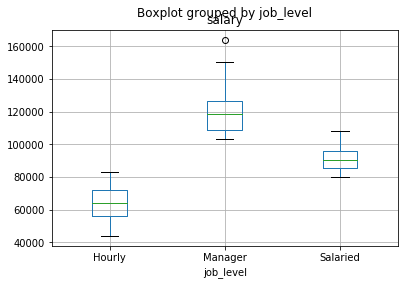

In [262]:
df.boxplot(column='salary',by='job_level')

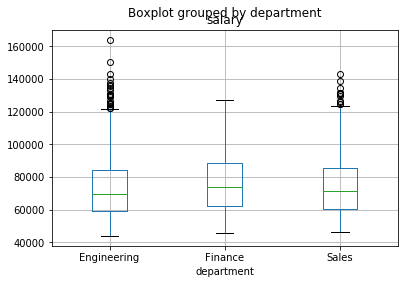

In [263]:
df.boxplot(column='salary',by='department')

# TWO way anova

In [264]:
mod=ols('salary~job_level:department',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)
#passes

                          df        sum_sq       mean_sq           F  PR(>F)
job_level:department     8.0  4.096065e+11  5.120082e+10  640.500137     0.0
Residual              1461.0  1.167906e+11  7.993881e+07         NaN     NaN


In [265]:
mod=ols('salary~job_level*department',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

                          df        sum_sq       mean_sq            F  \
job_level                2.0  4.093172e+11  2.046586e+11  2560.190628   
department               2.0  1.877357e+08  9.386783e+07     1.174246   
job_level:department     4.0  1.016302e+08  2.540756e+07     0.317838   
Residual              1461.0  1.167906e+11  7.993881e+07          NaN   

                        PR(>F)  
job_level             0.000000  
department            0.309343  
job_level:department  0.866164  
Residual                   NaN  


In [267]:
mod=ols('salary~job_level+department+job_level+department',data=df).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)
#passses

                df        sum_sq       mean_sq            F    PR(>F)
job_level      2.0  4.093172e+11  2.046586e+11  2564.968034  0.000000
department     2.0  1.877357e+08  9.386783e+07     1.176437  0.308667
Residual    1465.0  1.168922e+11  7.978992e+07          NaN       NaN


In [280]:
car=pd.read_csv("Cars93.csv")
car.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [282]:
mod=ols('Price~DriveTrain',data=car).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

#it passes

              df      sum_sq    mean_sq          F    PR(>F)
DriveTrain   2.0  1722.28626  861.14313  11.294939  0.000042
Residual    90.0  6861.73503   76.24150        NaN       NaN


In [284]:
mod=ols('Price~AirBags',data=car).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

#it passes

            df       sum_sq      mean_sq          F        PR(>F)
AirBags    2.0  2746.983995  1373.491997  21.177572  2.901187e-08
Residual  90.0  5837.037296    64.855970        NaN           NaN


In [285]:
mod=ols('Price~DriveTrain:AirBags',data=car).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

#high p-value its redundantseperately it passes but not together.

                      df       sum_sq     mean_sq         F        PR(>F)
DriveTrain:AirBags   8.0  3692.135327  461.516916  7.860768  7.447238e-08
Residual            85.0  4990.471675   58.711431       NaN           NaN


In [286]:
x=np.array([2,3,5.5,5.4,6.4,7,7.8])
y=np.array([4,10,9,17,22,16.8,25])

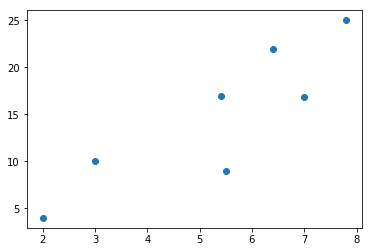

In [287]:
plt.scatter(x,y)

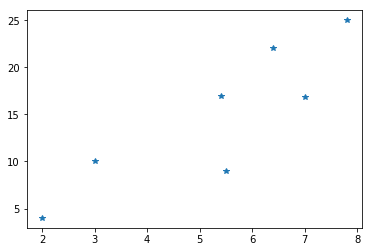

In [298]:
plt.plot(x,y,"*")

In [295]:
b1=np.cov(x,y,ddof=1)
b1

array([[ 4.43      , 13.76      ],
       [13.76      , 56.33904762]])

In [297]:
b1/(np.var(x,ddof=1))

array([[ 1.        ,  3.10609481],
       [ 3.10609481, 12.71761797]])

In [307]:
#Slope
beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)

In [309]:
#INTERCEPT
beta0=np.mean(y)-beta1*np.mean(x)
beta0

-1.6337310544985488

In [311]:
y_pred=beta0+beta1*x
print(y_pred)

[ 4.57845856  7.68455337 15.44979039 15.13918091 18.24527572 20.1089326
 22.59380845]


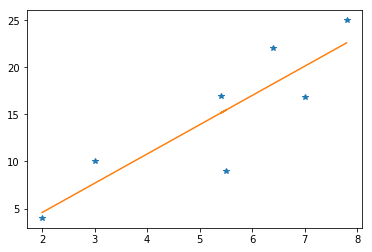

In [319]:
plt.plot(x,y,"*")
plt.plot(x,y_pred)

In [342]:
x=np.array([2,3,5.5,5.4,6.4,7,7.8])
y=np.array([4,10,9,17,22,16.8,25])
s=pd.DataFrame({'x':[2,3,5.5,5.4,6.4,7,7.8],'y':[4,10,9,17,22,16.8,25]})
s

,x,y
0,2.0,4.0
1,3.0,10.0
2,5.5,9.0
3,5.4,17.0
4,6.4,22.0
5,7.0,16.8
6,7.8,25.0


In [349]:
import statsmodels.formula.api as smf

model=smf.ols("y~x",s).fit()
model

In [360]:
Y=model.predict(s["x"])
print(Y)

x=s[["x"]]

0     4.578459
1     7.684553
2    15.449790
3    15.139181
4    18.245276
5    20.108933
6    22.593808
dtype: float64


In [361]:
from sklearn.linear_model import LinearRegression 

In [362]:
LR=LinearRegression()
LR.fit(x,y)
LR.predict(x)

array([ 4.57845856,  7.68455337, 15.44979039, 15.13918091, 18.24527572,
       20.1089326 , 22.59380845])

In [363]:
LR.coef_

array([3.10609481])

In [364]:
LR.intercept_

-1.6337310544985453

In [368]:
adver=pd.read_csv("Advertising.csv")
adver.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


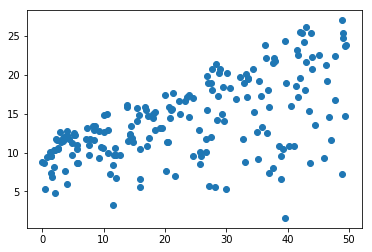

In [371]:
plt.scatter(adver.Radio,adver.Sales)

In [372]:
adver.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


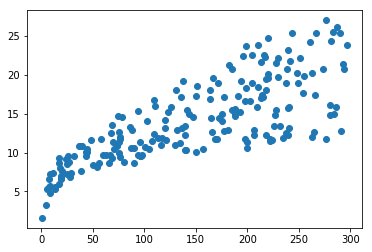

In [373]:
plt.scatter(adver.TV,adver.Sales)

In [374]:
model=smf.ols("Sales~TV+Radio+Newspaper",adver).fit()

In [375]:
model

In [377]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        16:01:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [401]:
model=smf.ols("Sales~TV+Radio",adver).fit()

In [402]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        16:31:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
#Newspaper is not impacting the sales

#Money invested on radio and tv has positive impact

In [404]:
y_pred=model.predict(adver[["TV","Radio"]])


In [408]:
radio_tv_rmse=np.sqrt(np.sum((adver["Sales"]-y_pred)**2)/adver.shape[0])
radio_tv

1.6687030593661927

In [405]:
y_pred.head()

0    20.555465
1    12.345362
2    12.337018
3    17.617116
4    13.223908
dtype: float64

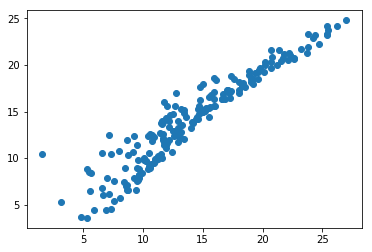

In [386]:
plt.scatter(adver["Sales"],y_pred)

In [387]:
# R2 value tells the strength of the model


In [388]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.83e-98
Time:                        16:14:11   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
model=smf.ols("Sales~TV",adver).fit()
y_pred=model.predict(adver["TV"])
y_pred.head()

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [411]:
tv_rmse=np.sqrt(np.sum((adver["Sales"]-y_pred)**2)/adver.shape[0])
tv_rmse

3.2423221486546887

In [391]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        16:16:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
model=smf.ols("Sales~Radio",adver).fit()
y_pred=model.predict(adver["Radio"])
y_pred.head()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.35e-19
Time:                        16:32:54   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
radio_rmse=np.sqrt(np.sum((adver["Sales"]-y_pred)**2)/adver.shape[0])
radio_rmse


4.2535159274564185

# Sklearn

In [416]:
x=adver[["TV","Radio"]]
y=adver["Sales"]

In [419]:

LR=LinearRegression()
LR.fit(x,y)
LR.predict(x)
LR.coef_


array([0.04575482, 0.18799423])

In [420]:
LR.intercept_

2.9210999124051362

In [422]:
LR.score(x,y)

0.8971942610828956

In [424]:
y_pred=LR.predict(x)

In [425]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y,y_pred))


1.668703059366193

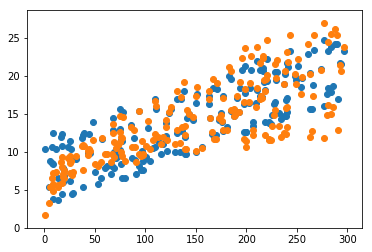

In [435]:
plt.scatter(adver["TV"],y_pred)
plt.scatter(adver["TV"],adver["Sales"])

In [437]:
#